### 1.Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

### 2.Read Data_set

In [2]:
# Đường dẫn file
file_path=f"../data_danhgia_module_router_generate/eval_query_router.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")
print(df.head(5))

                                    user_Query  expected_Domain  \
0                    Xin chào, bạn khỏe không?                0   
1         Chào buổi sáng, hôm nay thế nào rồi?                0   
2    Hey! Lâu rồi không gặp, dạo này ổn không?                0   
3  Chào bạn! Hy vọng bạn có một ngày tốt lành.                0   
4                    Hello! Có ai ở đây không?                0   

   result_Domain_Prompt  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


### 3.Evaluation

In [3]:
accuracy = accuracy_score(df["expected_Domain"], df["result_Domain_Prompt"])
f1 = f1_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
precision = precision_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
recall = recall_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9780
F1 Score: 0.9780
Precision: 0.9793
Recall: 0.9780


C:\Users\hdang\AppData\Local\Temp\ipykernel_16372\2888934282.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=metrics_df, x='Metric', y='Score', palette=custom_colors)
C:\Users\hdang\AppData\Local\Temp\ipykernel_16372\2888934282.py:37: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
c:\Users\hdang\.virtualenvs\machinelearning-lTTH8rYd\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


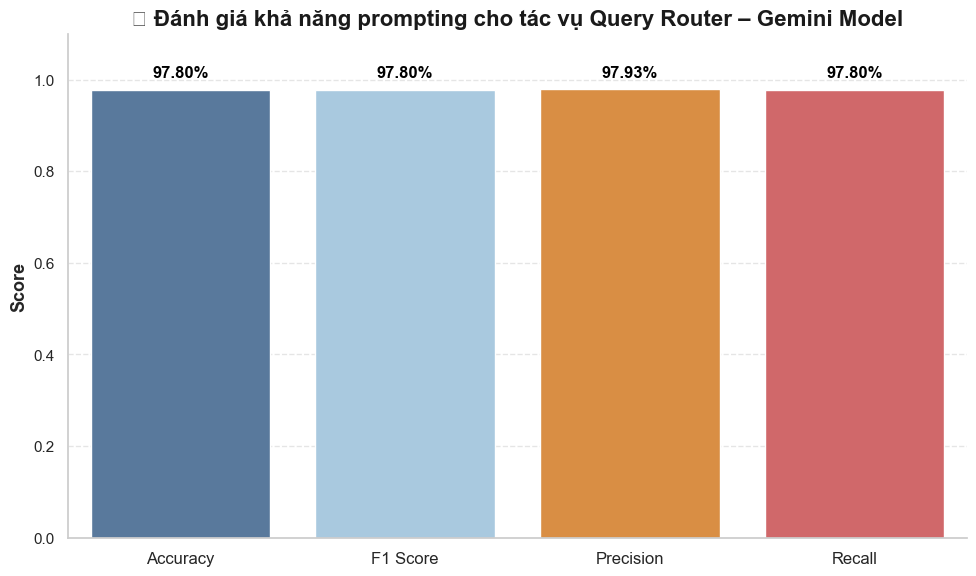

In [7]:
# 1. Tạo DataFrame
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy, f1, precision, recall]
})

# 2. Style chuyên nghiệp
sns.set(style="whitegrid", font_scale=1.2)

# 🎨 3. Bộ màu Flat Design hiện đại và hài hòa hơn
custom_colors = ["#4E79A7",  # Xanh navy – Accuracy
                 "#A0CBE8",  # Xanh pastel – F1
                 "#F28E2B",  # Cam nhạt – Precision
                 "#E15759"]  # Đỏ cam – Recall

# 4. Tạo biểu đồ
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=metrics_df, x='Metric', y='Score', palette=custom_colors)

# 5. Thêm nhãn phần trăm trên từng cột
for index, row in metrics_df.iterrows():
    barplot.text(index, row['Score'] + 0.02, f"{row['Score']:.2%}",
                 color='black', ha='center', va='bottom', fontsize=12, fontweight='semibold')

# 6. Tuỳ chỉnh biểu đồ chuyên nghiệp
plt.title("🎯 Đánh giá khả năng prompting cho tác vụ Query Router – Gemini Model",
          fontsize=16, fontweight='bold', color="#1A1A1A")
plt.ylabel("Score", fontsize=13, fontweight='bold')
plt.xlabel("")
plt.ylim(0, 1.1)
plt.xticks(fontsize=12, fontweight='medium')
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()


plt.tight_layout()
plt.show()